# Verification of NRTidal notebook

Here we show the (mis)matches we obtained with our NRTidal code to check the implementation. Idea is to run the check_NRTidal py script under test, which saves the samples with parameters and match values to a CSV, and then load it and analyze it here.

In [122]:
import numpy as np
import matplotlib.pyplot as plt

import jax
import jax.numpy as jnp

# from ripple.waveforms import IMRPhenomD
from ripple.waveforms.X_NRTidalv2 import _get_merger_frequency
import matplotlib.pyplot as plt
from ripple import ms_to_Mc_eta
from ripple.constants import MSUN, gt
from jax import grad, vmap
from functools import partial
# import importlib
# import tqdm

%load_ext autoreload
%autoreload 2
from ripple.waveforms import X_NRTidalv2

# To get plot style
import requests
script_url = "https://raw.githubusercontent.com/ThibeauWouters/cheat_sheets/main/myploystyle.py"
exec(requests.get(script_url).text)

jax.config.update("jax_enable_x64", True) # improve precision for comparing waveforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
import os
import pandas as pd
os.getcwd()

'/Users/Woute029/Documents/Code/ripple/notebooks'

## Remove me: getting sense of upper limit frequency

In [124]:
m = 3
l = 4000
theta = np.array([m, m, 0, 0, l, l])
f_merger = _get_merger_frequency(theta)
f_merger

Array(531.10743693, dtype=float64)

## Load in match files

In [125]:
matches_filename = os.path.join(os.getcwd(), "../test/NRTidal_matches.csv")
print(f"Reading in NRTidal matches from {matches_filename}")
matches_df = pd.read_csv(matches_filename)
matches_df["mismatch"] = np.log10(1 - matches_df["match"])
matches_df

Reading in NRTidal matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/NRTidal_matches.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,match,mismatch
0,0,1.869941,1.102144,0.0,0.0,2750.129500,1353.434791,1.0,-9.030507
1,1,1.612227,1.034880,0.0,0.0,4724.354130,1023.368045,1.0,-8.872098
2,2,2.299933,2.068206,0.0,0.0,1641.645163,379.114388,1.0,-9.722202
3,3,2.363825,1.075867,0.0,0.0,1498.398648,3104.210417,1.0,-9.183280
4,4,2.466677,1.690623,0.0,0.0,3119.715558,3931.256642,1.0,-9.604091
...,...,...,...,...,...,...,...,...,...
995,995,2.152021,1.450135,0.0,0.0,3496.971774,3569.390750,1.0,-9.362246
996,996,2.997839,2.470888,0.0,0.0,1763.790831,2384.652038,1.0,-10.126879
997,997,1.583798,1.468248,0.0,0.0,2203.915768,4848.148774,1.0,-9.133419
998,998,2.569273,1.200220,0.0,0.0,1622.491408,4913.262420,1.0,-9.339324


## Fixing NaNs in code

In [126]:
# filtered_df = matches_df[matches_df['match'].isna()]
# mass_values = filtered_df["m1"]
# lambda_values = filtered_df["lambda1"]
# # match_values = filtered_df["match"]
# # mismatch_values = np.log10(1 - match_values)
# plt.scatter(mass_values, lambda_values)
# plt.show()

# # Show an example of a NaN param combination
# print(mass_values[0])
# print(lambda_values[0])

## Look at match values

In [127]:
mass_values = matches_df["m1"] + matches_df["m2"]
lambda1_values = matches_df["lambda1"]
lambda2_values = matches_df["lambda2"]
match_values = matches_df["match"]
mismatch_values = matches_df["mismatch"]

In [128]:
match_values[0]

0.999999999067834

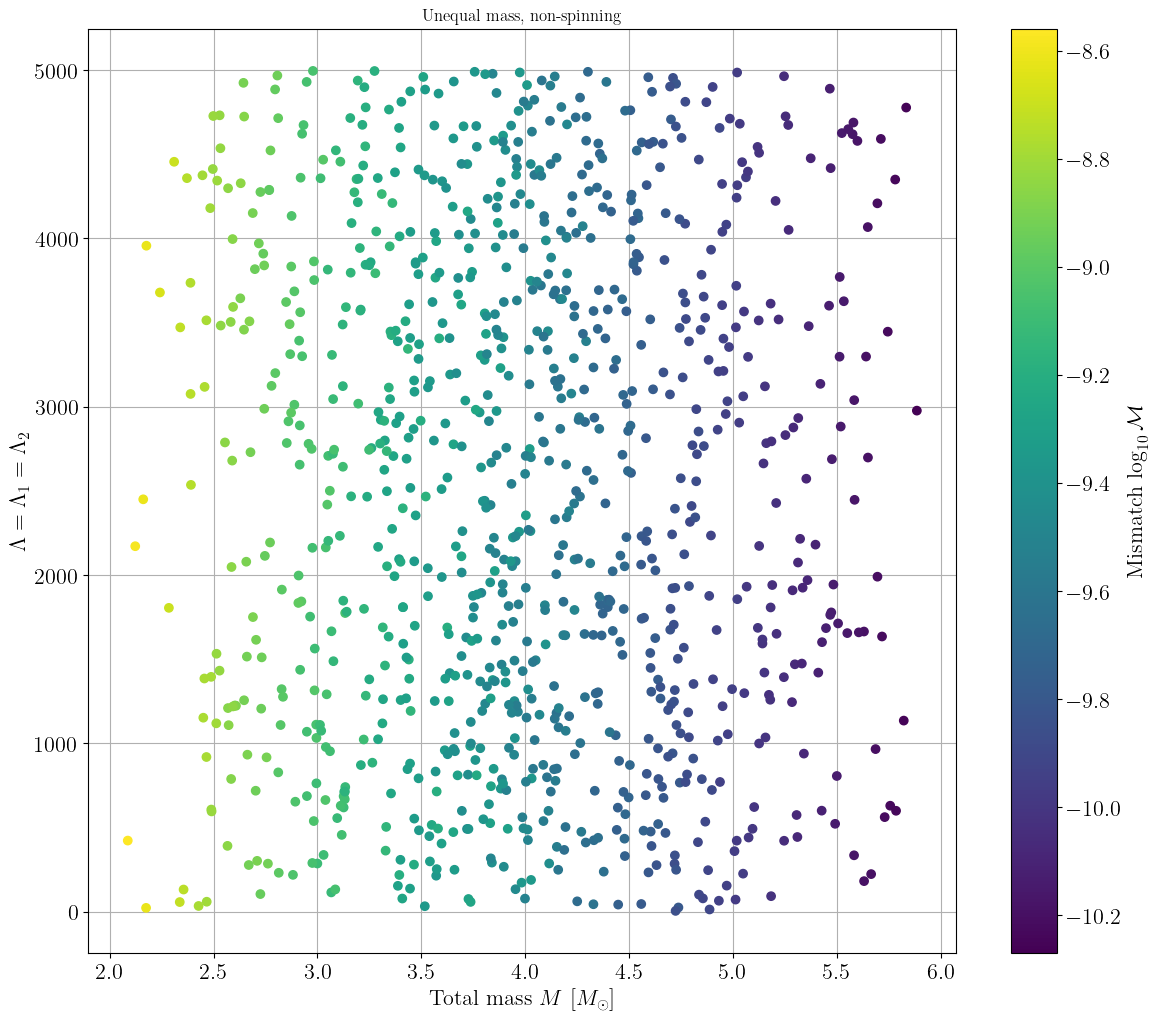

In [129]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(mass_values, lambda1_values, c = mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"$\Lambda = \Lambda_1 = \Lambda_2$")
plt.title(r"Unequal mass, non-spinning")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.savefig("../test/figures/match_equal_mass_equal_lambdas.pdf", bbox_inches = 'tight')
# plt.savefig("../test/figures/match_equal_mass_equal_lambdas.png", bbox_inches = 'tight')
plt.show()

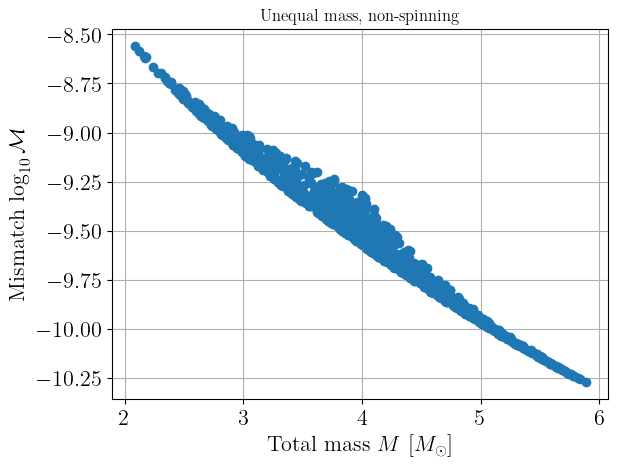

In [133]:
plt.scatter(mass_values, mismatch_values, zorder=100)
plt.xlabel(r"Total mass $M$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.title(r"Unequal mass, non-spinning")
plt.show()

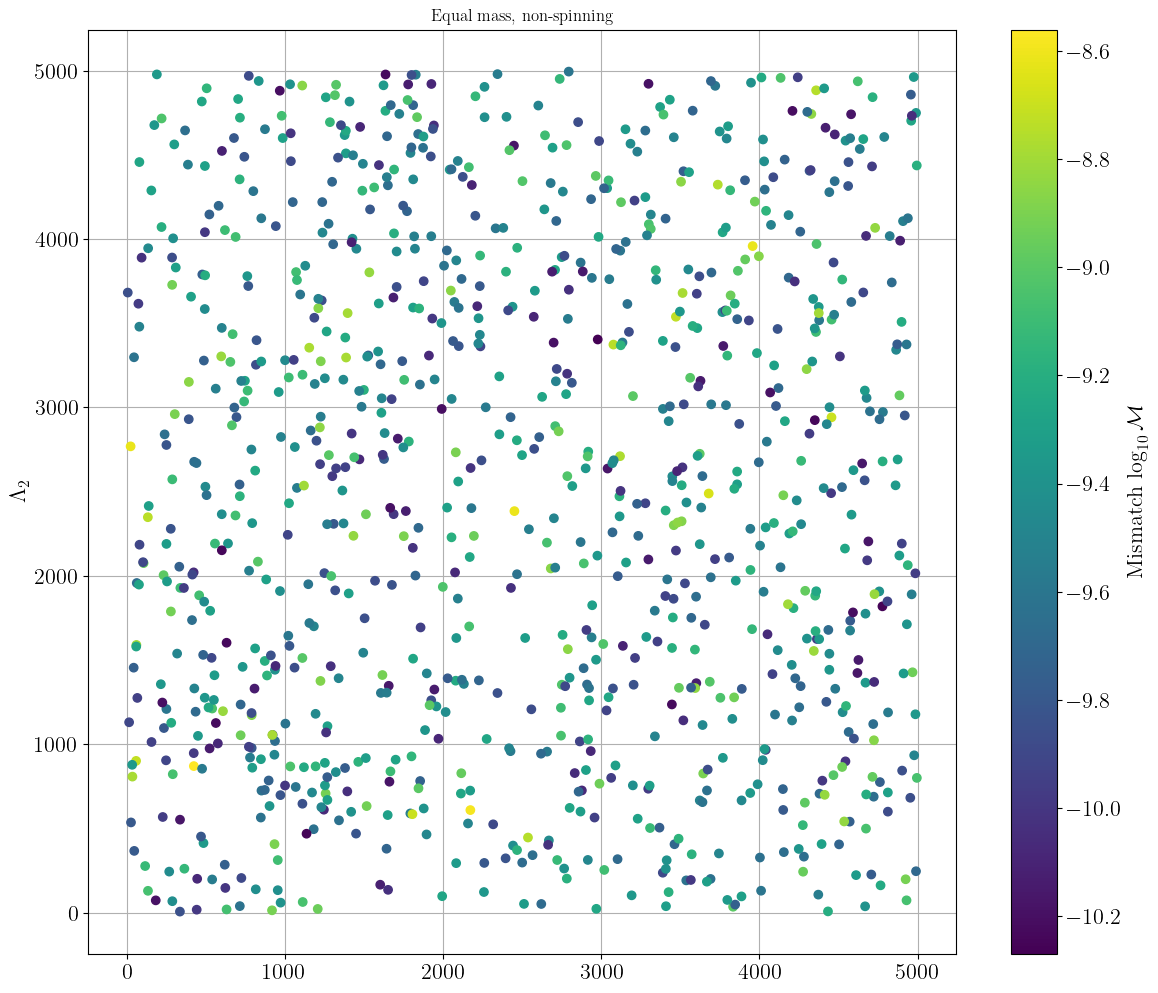

In [130]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(lambda1_values, lambda2_values, c = mismatch_values, zorder=100)
plt.ylabel(r"$\Lambda_2$")
plt.ylabel(r"$\Lambda_2$")
plt.title(r"Equal mass, non-spinning")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.savefig("../test/figures/match_NRTidalv2_nonspinning.pdf", bbox_inches = 'tight')
# plt.savefig("../test/figures/match_NRTidalv2_nonspinning.png", bbox_inches = 'tight')
plt.show()